## Panels genetic random results

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [3]:
base_path = '../../../results_metrics_aggregated_bme/perturbagen_pred'

In [4]:
##########
#Mechanistic baselines 
##########
# Initialize an empty dictionary
performance = {}
selector = {'cancer_genes': 'Cancer genes',
            'cancer_targets': 'Cancer targets',
            'random': 'Random',
            'perturbed_genes': 'Perturbed genes'
            }
paths = glob(osp.join(base_path, 'baselines/v2/mechanistic/random/*/*_genetic*.csv'))

for path in paths:
    df = pd.read_csv(path)

    # Iterate over the rows of the DataFrame
    for _, row in df.iterrows():
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        baseline = selector[path.split('/')[8]]

        cellline = row['Cellline']
        folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        if metric not in performance[cellline]:
            performance[cellline][metric] = {}
        if baseline not in performance[cellline][metric]:
            performance[cellline][metric][baseline] = []
        
        # Add the folds data to the dictionary
        performance[cellline][metric][baseline] = folds
    


In [5]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'v2/Biolord/genetic/random/biolord_genetic_within_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [6]:
##########
#cellOT
##########

paths = glob(osp.join(base_path, 'v2/cellot/genetic/random/cellot_genetic_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [7]:
##########
#GEARS
##########

paths = glob(osp.join(base_path, 'v2/GEARS/genetic/gears_genetic_within_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'GEARS'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [8]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'v2/scGEN/genetic/random/scgen_genetic_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [9]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'v2/PDGrapher/genetic/random/*_drugpred_within_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = row['Cellline']
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric]['PDGrapher'] = values


In [10]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

## Panel proportion of partially accurate samples

/tmp/ipykernel_1891702/3421343304.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


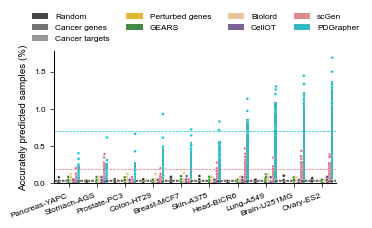

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator


# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']
# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'GEARS': '#228B22',
    'Perturbed genes': '#FFC000'
    
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'GEARS', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    # plt.ylim(0,5)

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.35), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.92, bottom = 0.2, top = 0.8)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('Accurately predicted samples (%)')
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




In [12]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)


,Cell Line,Method_SecondBest,percentage of samples with partially accurate predictions_PDGrapher,percentage of samples with partially accurate predictions_SecondBest,Difference
4,Ovary-ES2,scGen,1.375066,0.286091,1.088976
8,Brain-U251MG,scGen,1.227066,0.300206,0.926860
1,Lung-A549,scGen,1.092558,0.223987,0.868571
3,Head-BICR6,scGen,0.859176,0.316418,0.542758
6,Breast-MCF7,Biolord,0.553952,0.053232,0.500720
0,Skin-A375,scGen,0.559785,0.180980,0.378804
5,Colon-HT29,scGen,0.462850,0.101968,0.360882
7,Prostate-PC3,Biolord,0.282621,0.046246,0.236375
9,Pancreas-YAPC,scGen,0.243357,0.135170,0.108188
2,Stomach-AGS,scGen,0.263104,0.269181,-0.006077


## Panel nDCG

/tmp/ipykernel_1891702/3564765994.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


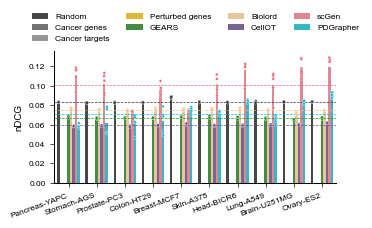

In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'nDCG'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']


with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.35), loc='upper center', ncol=4, frameon=False, title=None)
    plt.subplots_adjust(right=0.92, bottom = 0.2, top = 0.8)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('nDCG')
    plt.savefig(osp.join(outdir, 'panel_ndcg.pdf'))
    plt.show()


In [15]:
df = df_mean
metric = 'nDCG'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)




,Cell Line,Method_SecondBest,nDCG_PDGrapher,nDCG_SecondBest,Difference
6,Breast-MCF7,Random,0.074474,0.088137,-0.013663
7,Prostate-PC3,Random,0.061679,0.082402,-0.020723
0,Skin-A375,scGen,0.071841,0.100991,-0.029150
4,Ovary-ES2,scGen,0.090046,0.119786,-0.029741
5,Colon-HT29,scGen,0.063724,0.095552,-0.031828
3,Head-BICR6,scGen,0.083585,0.115919,-0.032334
1,Lung-A549,scGen,0.065896,0.101037,-0.035141
8,Brain-U251MG,scGen,0.082696,0.118243,-0.035547
2,Stomach-AGS,scGen,0.061625,0.102267,-0.040643
9,Pancreas-YAPC,scGen,0.058273,0.110897,-0.052624


In [16]:
performance['A549']['nDCG']

{'Random': [0.0833340670162631,
  0.0843824023143808,
  0.0833725583502167,
  0.0826955807931165,
  0.0824368357884448],
 'Biolord': [0.0751037918911101,
  0.0758453408253738,
  0.0738986397317275,
  0.0756583013067052,
  0.0746527431295446],
 'CellOT': [0.0604399502944136,
  0.0596761558225301,
  0.0598339509803661,
  0.0602719827909102,
  0.0590553404056147],
 'GEARS': [0.0654959672511581,
  0.0672500674462521,
  0.065942121476967,
  0.0666537005809365,
  0.0661848254907492],
 'scGen': [0.1071932890338191,
  0.0773243199595148,
  0.1102669359623007,
  0.1122958075242194,
  0.0981069866350347],
 'PDGrapher': [0.066775127617301,
  0.0603185749488681,
  0.0693264628371636,
  0.0634479769608711,
  0.0696131393387254]}

## Panel aggregated recall@k

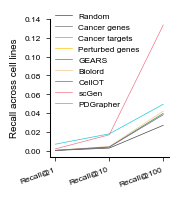

In [18]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()




df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend(line_handles, line_labels, bbox_to_anchor=(0.4, 1.1), loc='upper center', ncol=1, frameon=False, title=None)
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.23)
    # plt.subplots_adjust(right=0.92, bottom = 0.2, top=0.8)
    plt.xticks(rotation=20, ha="right")
    # plt.xticks(rotation=20, ha="right")
    plt.ylabel('Recall across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


## Panel all metrics ranking

/tmp/ipykernel_1891702/2755975540.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)


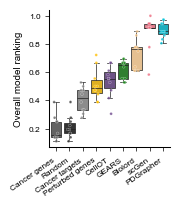

In [20]:
df = pd.read_csv(osp.join(base_path, 'v2/rank_table_genetic_within_v2.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen',
    'BL Rand Pert Genes': 'Perturbed genes'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()


with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=2, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Overall model ranking')
    plt.xlabel('')
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.22)
    plt.xticks(rotation=35, ha="right")
    sns.despine()
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()

